Applying Cross-Validation to Random Forest Classifier

Exercise: Implement a random forest classifier and evaluate the model using k-fold cross-validation. Analyze the cross-validation scores to assess model stability.

In [60]:
import pandas as pd
df=pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [61]:
df.dropna()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [62]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [63]:
df=df.drop(columns='capital-loss')
df=df.drop(columns='capital-gain')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [64]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df['workclass']=encoder.fit_transform(df['workclass'])
df['education']=encoder.fit_transform(df['education'])
df['marital-status']=encoder.fit_transform(df['marital-status'])
df['occupation']=encoder.fit_transform(df['occupation'])
df['relationship']=encoder.fit_transform(df['relationship'])
df['race']=encoder.fit_transform(df['race'])
df['gender']=encoder.fit_transform(df['gender'])
df['native-country']=encoder.fit_transform(df['native-country'])
df['income']=encoder.fit_transform(df['income'])
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,30,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,4,257302,7,12,2,13,5,4,0,38,39,0
48838,40,4,154374,11,9,2,7,0,4,1,40,39,1
48839,58,4,151910,11,9,6,1,4,4,0,40,39,0
48840,22,4,201490,11,9,4,1,3,4,1,20,39,0


In [65]:
X=df.drop(columns='income')
y= df['income']

In [66]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
standardized_features= scaler.fit_transform(X)


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(standardized_features, y, test_size=0.2, random_state=42)

In [68]:
from sklearn.ensemble import RandomForestClassifier
forest_classifier= RandomForestClassifier()
forest_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [69]:
y_pred= forest_classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
from sklearn.model_selection import  cross_val_score

cv_scores = cross_val_score(forest_classifier, standardized_features, y, cv=5)  
print("Cross validation score: ", cv_scores)

Cross validation score:  [0.82526359 0.82598014 0.8264742  0.8277027  0.82964783]


In [71]:
mean = cv_scores.mean()
std = cv_scores.std()

print("Mean cross-validation score: ", mean)
print("Standard deviation of cross-validation scores: ", std)

Mean cross-validation score:  0.8270136927983177
Standard deviation of cross-validation scores:  0.0015385418354354125


Investigating Overfitting and Underfitting in Gradient Boosting Machines

Exercise: Train a gradient boosting classifier with varying numbers of estimators and learning rates.

 Evaluate the model for overfitting and underfitting by comparing training and validation performance.

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_booster= GradientBoostingClassifier()
gradient_booster.fit(X_train, y_train)

GradientBoostingClassifier()

In [73]:
estimators = [50, 100, 150, 200]
learning_rates = [0.01, 0.05, 0.1, 0.2]

In [74]:
train_scores = []
val_scores = []

In [75]:
from sklearn.metrics import accuracy_score

for n_estimators in estimators:
    for learning_rate in learning_rates:
        gradient_booster = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)

        gradient_booster.fit(X_train, y_train)

        yTrain_pred = gradient_booster.predict(X_train)
        yTest_pred = gradient_booster.predict(X_test)

        train_acc = accuracy_score(y_train, yTrain_pred)
        val_acc = accuracy_score(y_test, yTest_pred)

        # Store the results
        train_scores.append((n_estimators, learning_rate, train_acc))
        val_scores.append((n_estimators, learning_rate, val_acc))

        print("Estimators: ",n_estimators," Learning Rate: ", learning_rate)
        print(f"Training Accuracy: ", train_acc)
        print(f"Validation Accuracy: ", val_acc)


Estimators:  50  Learning Rate:  0.01
Training Accuracy:  0.7595014460113122
Validation Accuracy:  0.7655850138192241
Estimators:  50  Learning Rate:  0.05
Training Accuracy:  0.8290635477183733
Validation Accuracy:  0.8346811342000204
Estimators:  50  Learning Rate:  0.1
Training Accuracy:  0.8373045325416528
Validation Accuracy:  0.8421537516634251
Estimators:  50  Learning Rate:  0.2
Training Accuracy:  0.8432165433931359
Validation Accuracy:  0.8462483365748797
Estimators:  100  Learning Rate:  0.01
Training Accuracy:  0.8206178179305402
Validation Accuracy:  0.8239328488074521
Estimators:  100  Learning Rate:  0.05
Training Accuracy:  0.8386609679318199
Validation Accuracy:  0.8436892210052206
Estimators:  100  Learning Rate:  0.1
Training Accuracy:  0.843626033322243
Validation Accuracy:  0.847169618179957
Estimators:  100  Learning Rate:  0.2
Training Accuracy:  0.8470811045990838
Validation Accuracy:  0.8472719828027434
Estimators:  150  Learning Rate:  0.01
Training Accuracy: 

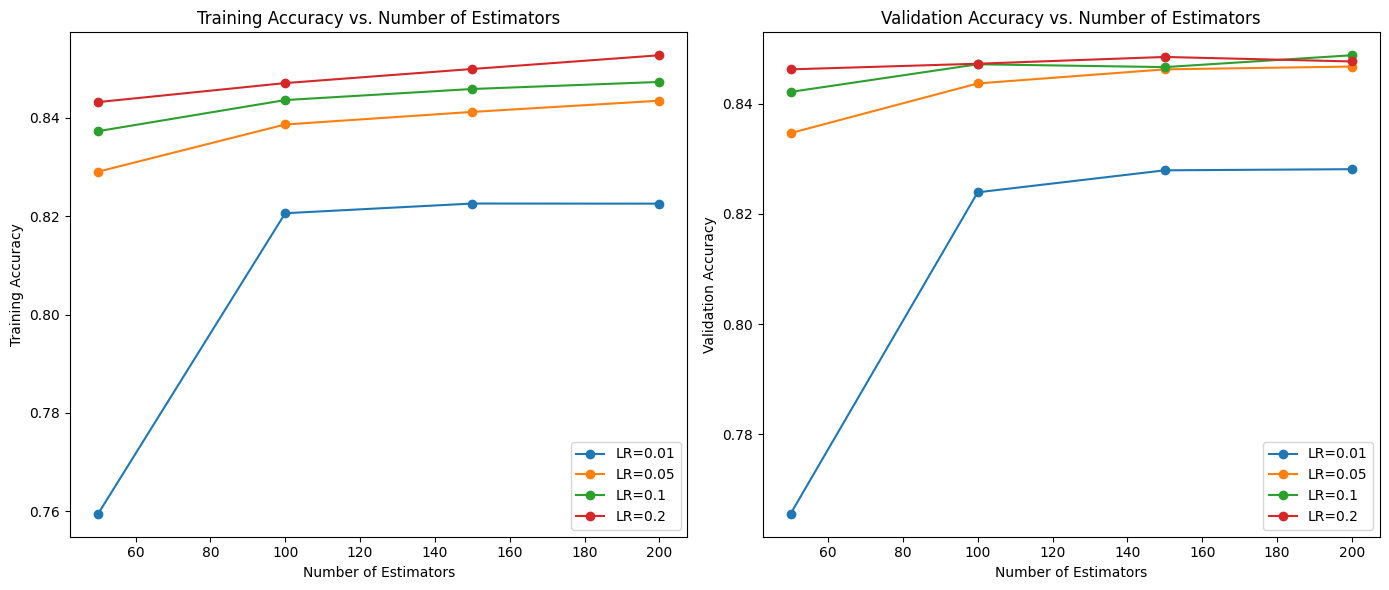

In [76]:
import matplotlib.pyplot as plt
train_scores_df = pd.DataFrame(train_scores, columns=['n_estimators', 'learning_rate', 'accuracy'])
val_scores_df = pd.DataFrame(val_scores, columns=['n_estimators', 'learning_rate', 'accuracy'])

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for learning_rate in learning_rates:
    subset = train_scores_df[train_scores_df['learning_rate'] == learning_rate]
    plt.plot(subset['n_estimators'], subset['accuracy'], marker='o', label=f'LR={learning_rate}')
plt.xlabel('Number of Estimators')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs. Number of Estimators')
plt.legend()

plt.subplot(1, 2, 2)
for learning_rate in learning_rates:
    subset = val_scores_df[val_scores_df['learning_rate'] == learning_rate]
    plt.plot(subset['n_estimators'], subset['accuracy'], marker='o', label=f'LR={learning_rate}')
plt.xlabel('Number of Estimators')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Number of Estimators')
plt.legend()

plt.tight_layout()
plt.show()


Evaluating Precision, Recall, and F1-Score for Random Forests

Exercise: Implement a random forest classifier and calculate precision, recall, and F1-score. 

Discuss the trade-offs between these metrics and their importance for classification tasks.

In [79]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
f1_score= f1_score(y_test, y_pred)

print("Precision: ", precision)
print("Recall Score: ", recall)
print("f1 score: ", f1_score)

Precision:  0.6728016359918201
Recall Score:  0.5746724890829694
f1 score:  0.6198775317946302
